In [2]:
import pandas as pd

df = pd.read_csv("taco_sales_(2024-2025).csv")

df['Order Time'] = pd.to_datetime(df['Order Time'], dayfirst=True)
df['Delivery Time'] = pd.to_datetime(df['Delivery Time'], dayfirst=True)

df['Delivery Duration (min)'] = (df['Delivery Time'] - df['Order Time']).dt.total_seconds() / 60

df['Delivery Status'] = df['Delivery Duration (min)'].apply(lambda x: 'On Time' if x <= 30 else 'Delayed')

df['Hour of Day'] = df['Order Time'].dt.hour

df['Day of Week'] = df['Order Time'].dt.day_name()


print(df.head())

df.to_csv("cleaned_taco_sales.csv", index=False)


   Order ID   Restaurant Name     Location          Order Time  \
0    770487      El Taco Loco     New York 2024-08-01 14:55:00   
1    671858      El Taco Loco  San Antonio 2024-11-23 17:11:00   
2    688508        Taco Haven       Austin 2024-11-21 20:24:00   
3    944962  Spicy Taco House       Dallas 2024-09-21 06:43:00   
4    476417     Casa del Taco  San Antonio 2024-07-24 11:01:00   

        Delivery Time  Delivery Duration (min) Taco Size     Taco Type  \
0 2024-08-01 15:36:00                     41.0   Regular  Chicken Taco   
1 2024-11-23 17:25:00                     14.0   Regular     Beef Taco   
2 2024-11-21 21:02:00                     38.0     Large     Pork Taco   
3 2024-09-21 07:28:00                     45.0   Regular  Chicken Taco   
4 2024-07-24 11:16:00                     15.0     Large     Pork Taco   

   Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  \
0               5           3.01       9.25     2.22          False   
1               

In [3]:
from google.colab import files

files.download('cleaned_taco_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

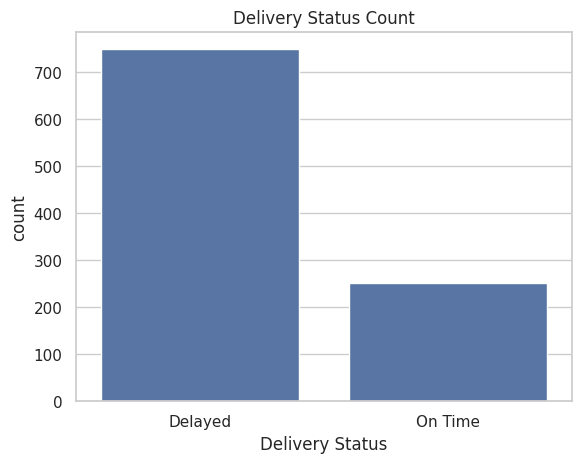

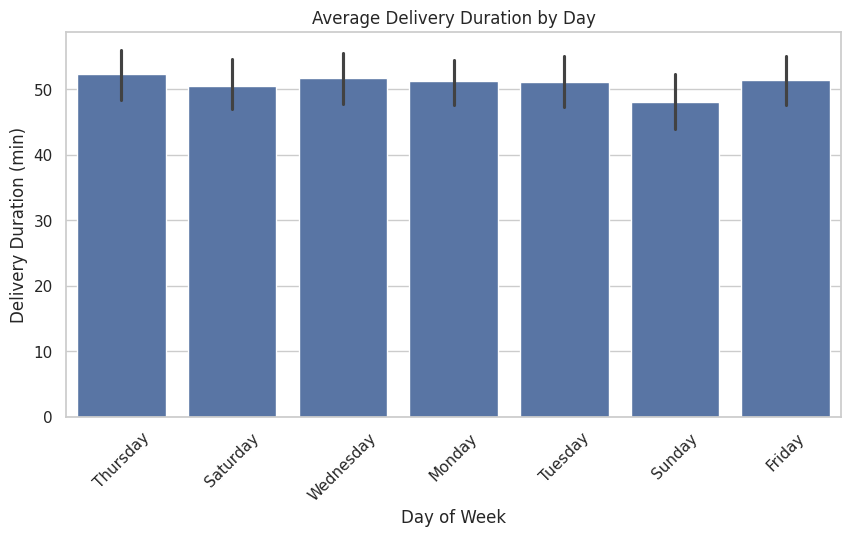

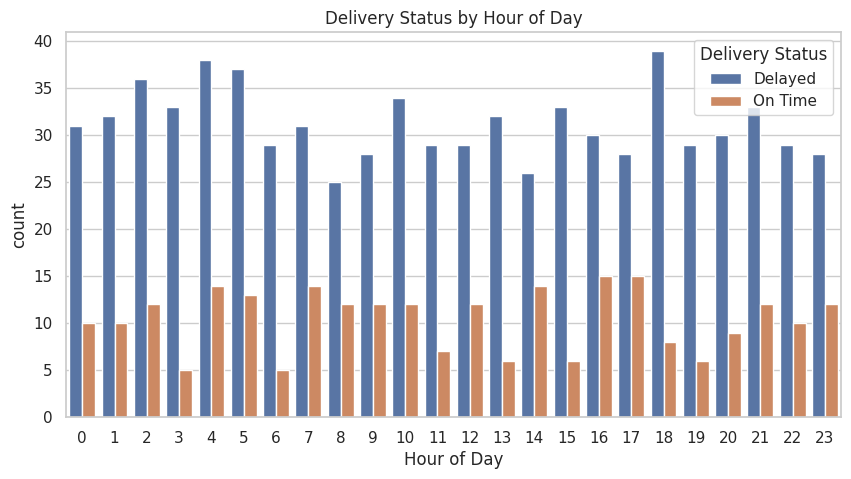

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


sns.countplot(data=df, x='Delivery Status')
plt.title("Delivery Status Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Day of Week', y='Delivery Duration (min)', estimator='mean')
plt.title("Average Delivery Duration by Day")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Hour of Day', hue='Delivery Status')
plt.title("Delivery Status by Hour of Day")
plt.show()


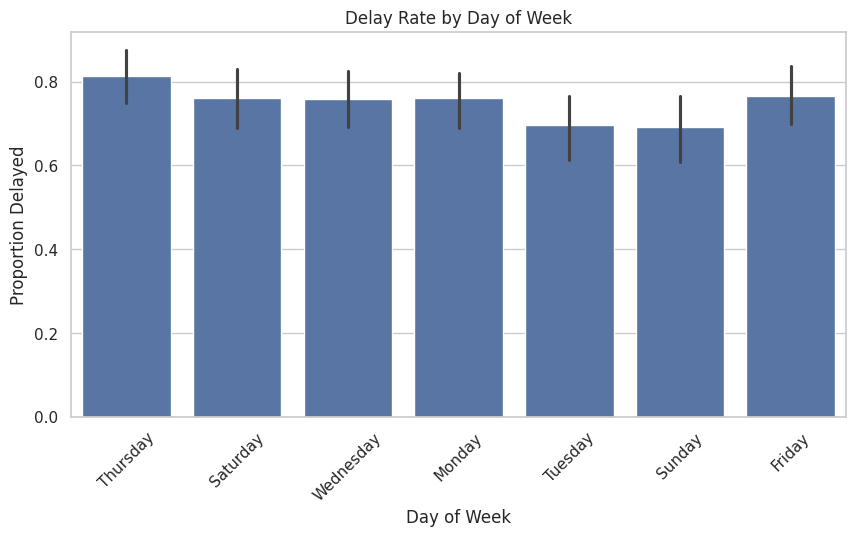

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Day of Week', y=df['Delivery Status'] == 'Delayed')
plt.title("Delay Rate by Day of Week")
plt.ylabel("Proportion Delayed")
plt.xticks(rotation=45)
plt.show()


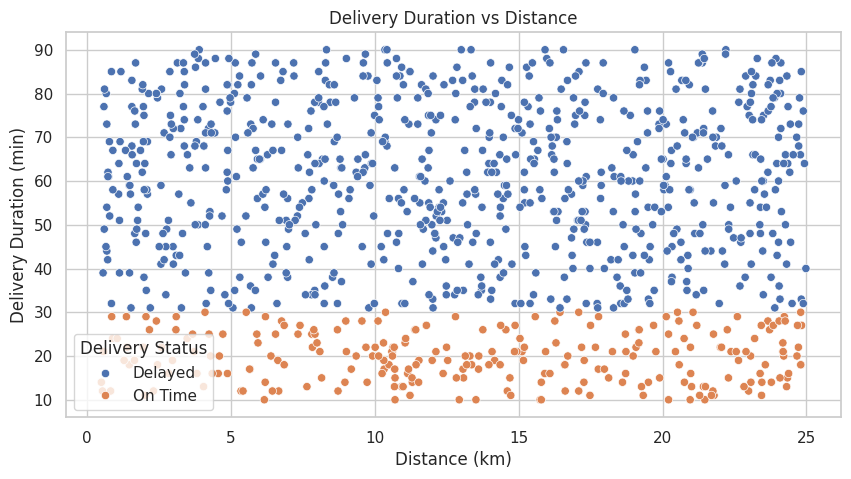

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Distance (km)', y='Delivery Duration (min)', hue='Delivery Status')
plt.title("Delivery Duration vs Distance")
plt.show()


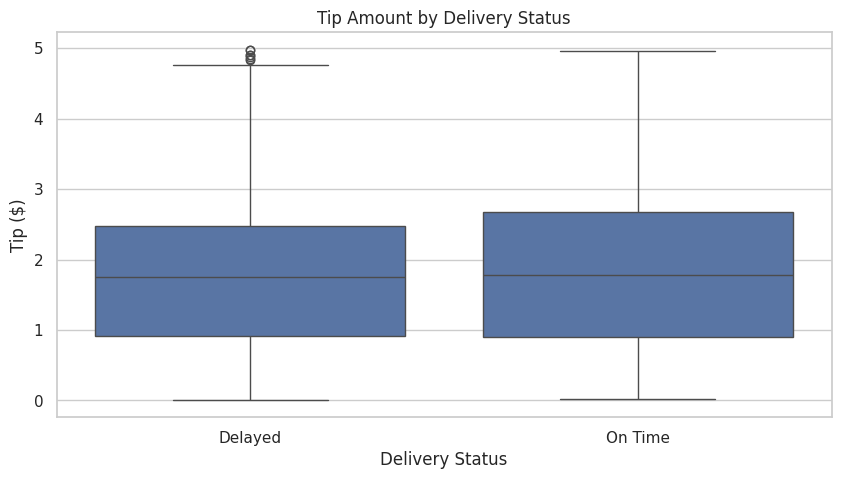

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Delivery Status', y='Tip ($)')
plt.title("Tip Amount by Delivery Status")
plt.show()


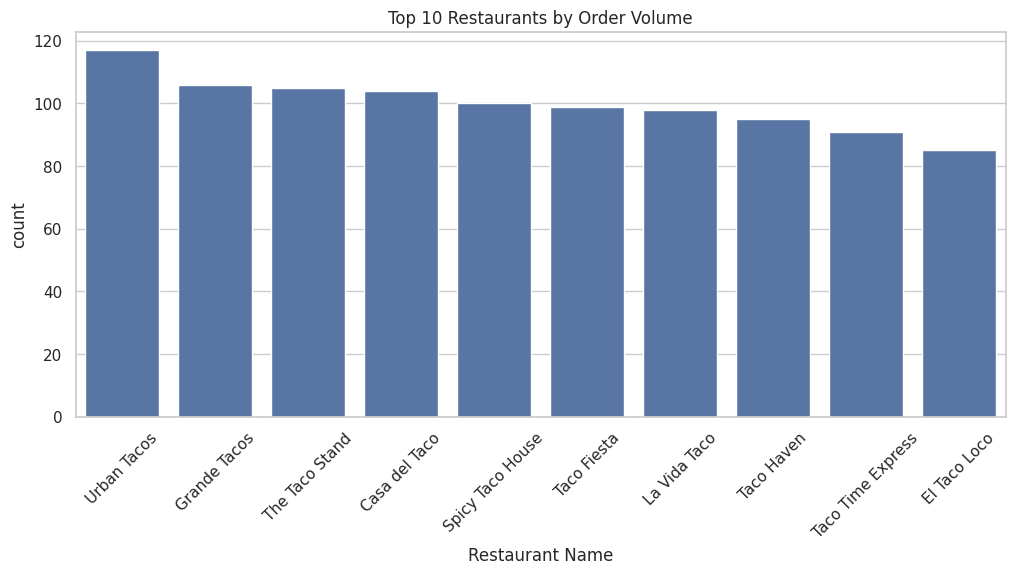

In [9]:
plt.figure(figsize=(12, 5))
top_restaurants = df['Restaurant Name'].value_counts().head(10).index
sns.countplot(data=df[df['Restaurant Name'].isin(top_restaurants)], x='Restaurant Name', order=top_restaurants)
plt.title("Top 10 Restaurants by Order Volume")
plt.xticks(rotation=45)
plt.show()


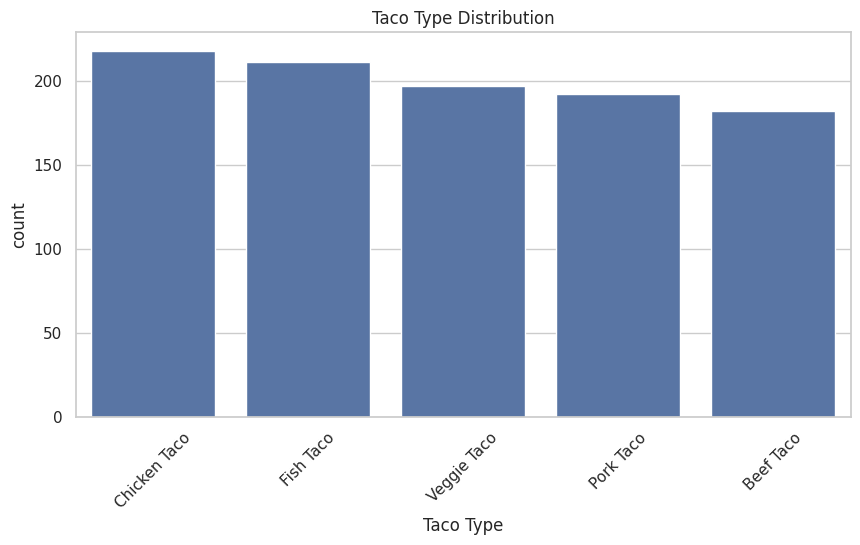

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Taco Type', order=df['Taco Type'].value_counts().index)
plt.title("Taco Type Distribution")
plt.xticks(rotation=45)
plt.show()


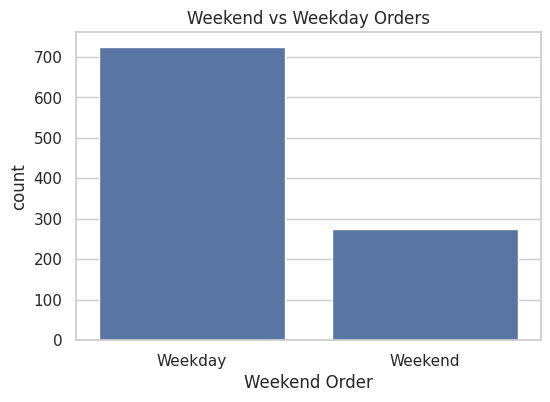

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Weekend Order')
plt.title("Weekend vs Weekday Orders")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()
